In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os
folder = '/Volumes/Seagate Por 7/Pose Estimation'
os.chdir(folder)
VIDEOfiles_names = sorted(glob.glob('*.h5'))

In [73]:
track = pd.read_hdf(VIDEOfiles_names[1])
bodyparts = np.array(['chin', 'mouth', 'head', 'body1', 'body2', 'tail'])

In [74]:
track

scorer    DLC_resnet50_test2Jun21shuffle1_200000                         \
bodyparts                                   chin                          
coords                                         x           y likelihood   
0                                      56.009033  246.291855   0.997157   
1                                      54.231163  245.572403   0.997129   
2                                      54.046177  245.203720   0.996788   
3                                      53.919830  245.640762   0.996255   
4                                      53.815968  245.134125   0.997174   
...                                          ...         ...        ...   
60068                                  96.503365  324.903809   0.998553   
60069                                  95.869072  324.574432   0.998661   
60070                                  95.446304  324.484253   0.998865   
60071                                  95.334450  324.701904   0.998746   
60072                                  94.486443  324.275665   0.998986   

scorer                                                                         \
bodyparts      mouth                              head                          
coords             x           y likelihood          x           y likelihood   
0          56.232998  234.222443   0.998085  56.147629  220.055466   0.991000   
1          55.712547  234.570328   0.998719  56.092579  220.602295   0.993058   
2          55.237381  234.651245   0.998465  55.634529  220.766891   0.987306   
3          54.929569  234.943604   0.998531  55.597019  220.907394   0.983597   
4          55.045071  234.398346   0.998780  55.906193  220.728561   0.986978   
...              ...         ...        ...        ...         ...        ...   
60068      91.351341  312.284332   0.998591  88.294724  298.757355   0.998987   
60069      90.918571  312.295868   0.998282  88.068588  298.808411   0.998793   
60070      90.687691  312.118103   0.998360  87.799789  298.971008   0.998859   
60071      90.379272  312.055847   0.998181  87.404289  298.725159   0.998861   
60072      89.833321  312.254150   0.998192  87.375870  299.209503   0.998637   

scorer                                                                         \
bodyparts      body1                             body2                          
coords             x           y likelihood          x           y likelihood   
0          51.960152  200.130188   0.998794  43.616707  131.824738   0.974506   
1          52.165871  200.578384   0.998566  43.730610  132.537491   0.971205   
2          50.827824  201.748810   0.998368  43.535919  132.306458   0.966876   
3          50.608643  201.731201   0.998326  43.885864  131.971680   0.968847   
4          50.680889  200.797012   0.998137  43.987534  132.493118   0.972020   
...              ...         ...        ...        ...         ...        ...   
60068      81.688965  276.757111   0.999950  59.717869  195.200180   0.998191   
60069      81.511566  276.737885   0.999943  59.682423  195.436523   0.998488   
60070      81.352516  277.011566   0.999933  59.643761  195.483337   0.998516   
60071      81.222214  276.832947   0.999936  59.506805  195.743454   0.998674   
60072      80.566116  277.615753   0.999896  59.449028  195.274597   0.998083   

scorer                                       
bodyparts       tail                         
coords             x           y likelihood  
0          79.108749  374.478088   0.983547  
1          78.737511  374.260620   0.983919  
2          78.707008  374.186218   0.984162  
3          78.774445  374.279785   0.981801  
4          78.768723  374.114441   0.983711  
...              ...         ...        ...  
60068      79.569664  373.223755   0.985429  
60069      79.373344  373.197418   0.985598  
60070      79.290627  373.163208   0.986840  
60071      48.387245  148.599884   0.992633  
60072      47.440311  149.874222   0.995952  

[60073 rows x 18 columns]

In [75]:
likelihoods = np.zeros(shape=(len(track), 6))

for i in range(6):
    likelihoods[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'likelihood'])

likelihoods = pd.DataFrame(likelihoods, columns=track.columns.get_level_values(1).unique())
likelihoods

bodyparts,chin,mouth,head,body1,body2,tail
0,0.997157,0.998085,0.991000,0.998794,0.974506,0.983547
1,0.997129,0.998719,0.993058,0.998566,0.971205,0.983919
2,0.996788,0.998465,0.987306,0.998368,0.966876,0.984162
3,0.996255,0.998531,0.983597,0.998326,0.968847,0.981801
4,0.997174,0.998780,0.986978,0.998137,0.972020,0.983711
...,...,...,...,...,...,...
60068,0.998553,0.998591,0.998987,0.999950,0.998191,0.985429
60069,0.998661,0.998282,0.998793,0.999943,0.998488,0.985598
60070,0.998865,0.998360,0.998859,0.999933,0.998516,0.986840
60071,0.998746,0.998181,0.998861,0.999936,0.998674,0.992633


In [76]:
x_pos = np.zeros(shape=(len(track), 6))
y_pos = np.zeros(shape=(len(track), 6))

for i in range(6):
    x_pos[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'x'])
    y_pos[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'y'])

x_pos = pd.DataFrame(x_pos, columns=track.columns.get_level_values(1).unique())
y_pos = pd.DataFrame(y_pos, columns=track.columns.get_level_values(1).unique())

/var/folders/dk/0fvz37fn27l9149spycxsyf80000gp/T/ipykernel_23950/3571848879.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


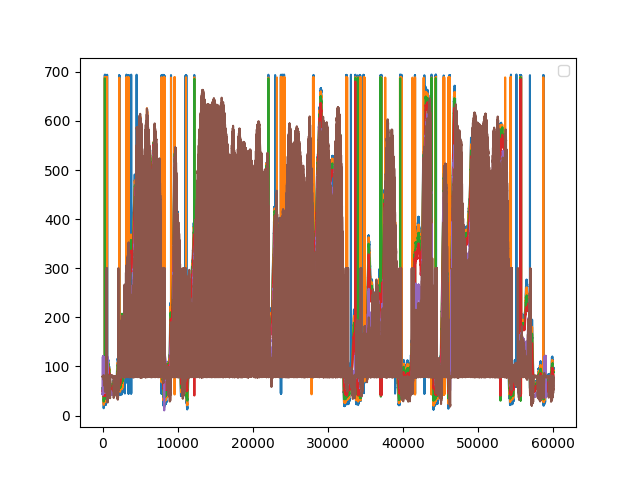

In [77]:
%matplotlib widget
plt.figure()
plt.plot(x_pos)

plt.legend()

In [78]:
for index,row in likelihoods.iterrows():
    outlier = any(row < .99)
    if outlier:
        track.iloc[index, :] =[np.nan for x in track.iloc[index,:]]
        

In [79]:
#interpolamos los nan
track = track.interpolate()

In [80]:
x_pos = np.zeros(shape=(len(track), 6))
y_pos = np.zeros(shape=(len(track), 6))

for i in range(6):
    x_pos[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'x'])
    y_pos[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'y'])

x_pos = pd.DataFrame(x_pos, columns=track.columns.get_level_values(1).unique())
y_pos = pd.DataFrame(y_pos, columns=track.columns.get_level_values(1).unique())


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


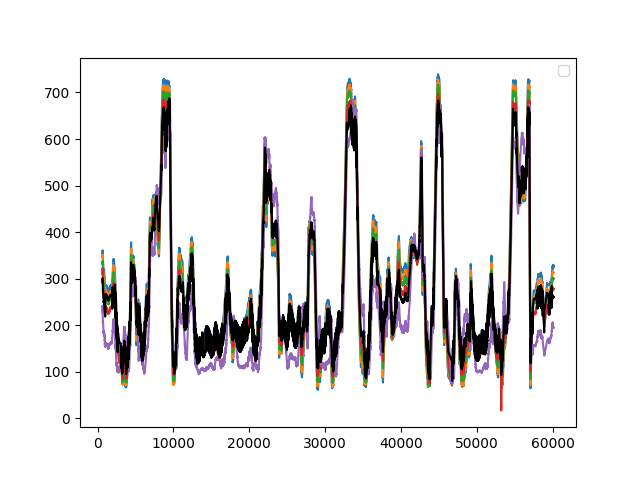

In [84]:
%matplotlib widget
plt.figure()
plt.plot(y_pos.iloc[:,:-1])
plt.plot(y_pos.mean(axis=1), c='k')
plt.legend()
